## Logistic Regression on the SPECTF Heart Data Set

Evaluating Logistic Regression on the [SPECTF Heart Data Set](https://archive.ics.uci.edu/ml/datasets/SPECTF+Heart). Using numpy, pandas and scikit-learn.

## Setup
Imports the required dependencies, and define the path to the dataset.

In [12]:
%matplotlib inline

import utils; reload(utils)
import numpy as np
import pandas as pd
from sklearn import metrics
from __future__ import print_function
from sklearn.linear_model import LogisticRegression

In [13]:
# Path to the dataset
path = '../core/src/test/resources/'

### Data Preparation
Prepare the training and testing dataset and convert them into numpy arrays.

In [16]:
train_csv = pd.read_csv(path + 'spectf.train.csv')
test_csv = pd.read_csv(path + 'spectf.test.csv')

train_data = np.array(train_csv)
X_train = train_data[:, 1:]
y_train = np.ravel(train_data[:, 0])

test_data = np.array(test_csv)
X_test = test_data[:, 1:]
y_test = np.ravel(test_data[:, 0])

## Modelling
Create a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and fit on the training dataset

- `penalty`: The norm used in regularisation (L1, L2)
- `tol`: Tolerance for stopping criteria
- `C`: Constraint violation for regularisation
- `fit_intercept`: Bias

In [27]:
model = LogisticRegression(penalty='l2', tol=0.001, C=100.0, fit_intercept=True)
model = model.fit(X_train, y_train)

# Check accuracy on the training dataset
model.score(X_train, y_train)

1.0

### Evaluation

Evaluate the model on the testing dataset, and display the testing accuracy, confusion matrix and percision/recall.

Testing Accuracy 0.612903225806

             precision    recall  f1-score   support

          0       0.10      0.47      0.16        15
          1       0.93      0.63      0.75       171

avg / total       0.86      0.61      0.70       186

Confusion matrix, without normalization


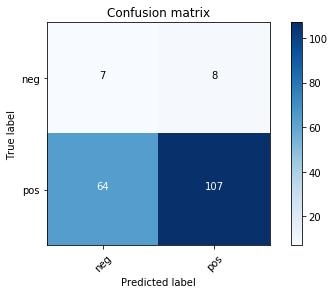

In [28]:
# Get predictions
preds = model.predict(X_test)

# Check accuracy on the testing dataset
print('Testing Accuracy', metrics.accuracy_score(y_test, preds), end='\n\n')


# F1 Score
print(metrics.classification_report(y_test, preds))

# Confusion matrix
cm = metrics.confusion_matrix(y_test, preds)
utils.plot_confusion_matrix(cm, ['neg', 'pos'])